<h3>6.1.4: Create Latitude and Longitude Combinations</h3>

In [13]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the time module.
import time

# TO MAKE AN API CALL
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [2]:
# create arrays of latitudes and longitudes with size of 1500, and declare each array as a variable
# pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

<p>The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple.</p>


In [3]:
# unpack our lat_lngs zip object into a list.
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

649


<h3>6.2.6: Get the City Weather Data</h3>
<h4>Import Dependencies, and Initialize an Empty List and Counters</h4>
<p>Before adding new code, make sure the following tasks are completed:
<ul>
    <li>Import your Requests Library and the weather_api_key.</li>
    <li>Build the basic URL for the OpenWeatherMap with your weather_api_key added to the URL.</li>
</ul>

*** SEE LINE 1 on Import Dependencies ***

<h4>Handle API Request Errors with try-except Blocks</h4>

In [6]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop Through the List of Cities and Build the City URL
# Loop through all the cities in our list.
#for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
#    if (i % 50 == 0 and i >= 50):
#        set_count += 1
#        record_count = 1
        
    # Create endpoint URL with each city.
#    city_url = url + "&q=" + "i"
    
    
# Instead of using two for loops, we can use the enumerate() method as an alternative way 
# to iterate through the list of cities and retrieve both the index, and the city from the list.
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cherskiy
Processing Record 2 of Set 1 | cabo san lucas
Processing Record 3 of Set 1 | yomitan
City not found. Skipping...
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | tilichiki
Processing Record 6 of Set 1 | dabat
Processing Record 7 of Set 1 | kimbe
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | saint george
Processing Record 10 of Set 1 | geraldton
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | castro
Processing Record 13 of Set 1 | wichita falls
Processing Record 14 of Set 1 | braslav
City not found. Skipping...
Processing Record 15 of Set 1 | ostrovnoy
Processing Record 16 of Set 1 | tasiilaq
Processing Record 17 of Set 1 | mahina
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | saint-pierre
Processing Record 20 of Set 1 | kahului
Processing Record 21 of Set 1 | nieuw amsterdam
Processing Record 

Processing Record 38 of Set 4 | airai
Processing Record 39 of Set 4 | yellowknife
Processing Record 40 of Set 4 | kuche
City not found. Skipping...
Processing Record 41 of Set 4 | de aar
Processing Record 42 of Set 4 | conceicao do mato dentro
Processing Record 43 of Set 4 | bambous virieux
Processing Record 44 of Set 4 | matara
Processing Record 45 of Set 4 | meyungs
City not found. Skipping...
Processing Record 46 of Set 4 | hirado
Processing Record 47 of Set 4 | kalmunai
Processing Record 48 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 49 of Set 4 | escarcega
Processing Record 50 of Set 4 | hun
Processing Record 1 of Set 5 | bubaque
Processing Record 2 of Set 5 | salekhard
Processing Record 3 of Set 5 | faanui
Processing Record 4 of Set 5 | ballina
Processing Record 5 of Set 5 | axim
Processing Record 6 of Set 5 | pokrovsk-uralskiy
City not found. Skipping...
Processing Record 7 of Set 5 | lakes entrance
Processing Record 8 of Set 5 | port-gentil
Processing 

Processing Record 24 of Set 8 | hamilton
Processing Record 25 of Set 8 | teahupoo
Processing Record 26 of Set 8 | yambio
Processing Record 27 of Set 8 | tocopilla
Processing Record 28 of Set 8 | mogocha
Processing Record 29 of Set 8 | tual
Processing Record 30 of Set 8 | lovington
Processing Record 31 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 32 of Set 8 | mananara
Processing Record 33 of Set 8 | mahibadhoo
Processing Record 34 of Set 8 | edd
Processing Record 35 of Set 8 | malangwa
Processing Record 36 of Set 8 | margate
Processing Record 37 of Set 8 | elizabeth city
Processing Record 38 of Set 8 | jaru
Processing Record 39 of Set 8 | straumen
Processing Record 40 of Set 8 | krasnoarmeysk
Processing Record 41 of Set 8 | hailar
Processing Record 42 of Set 8 | brae
Processing Record 43 of Set 8 | miles city
Processing Record 44 of Set 8 | bath
Processing Record 45 of Set 8 | giresun
Processing Record 46 of Set 8 | khani
Processing Record 47 of Set 8 | ranong


Processing Record 12 of Set 12 | thinadhoo
Processing Record 13 of Set 12 | mecca
Processing Record 14 of Set 12 | vigrestad
Processing Record 15 of Set 12 | mangan
Processing Record 16 of Set 12 | mumbwa
Processing Record 17 of Set 12 | dzhusaly
City not found. Skipping...
Processing Record 18 of Set 12 | afgoye
City not found. Skipping...
Processing Record 19 of Set 12 | aasiaat
Processing Record 20 of Set 12 | marsh harbour
Processing Record 21 of Set 12 | karasburg
Processing Record 22 of Set 12 | yerbogachen
Processing Record 23 of Set 12 | pilar
Processing Record 24 of Set 12 | udalo
City not found. Skipping...
Processing Record 25 of Set 12 | urdoma
Processing Record 26 of Set 12 | sitka
Processing Record 27 of Set 12 | u thong
Processing Record 28 of Set 12 | aksu
Processing Record 29 of Set 12 | mumford
Processing Record 30 of Set 12 | palauig
Processing Record 31 of Set 12 | bumba
Processing Record 32 of Set 12 | alyangula
Processing Record 33 of Set 12 | toliary
City not fou

In [7]:
len(city_data)

590


<h3>6.2.7: Create a DataFrame of City Weather Data</h3>
<p>To convert a list of dictionaries to a Pandas DataFrame using df = pd.DataFrame(list with dictionaries).</p>

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cherskiy,68.75,161.30,17.94,95,62,4.90,RU,2020-10-20 17:44:29
1,Cabo San Lucas,22.89,-109.91,93.99,46,5,5.82,MX,2020-10-20 17:42:47
2,Hermanus,-34.42,19.23,57.99,71,0,3.00,ZA,2020-10-20 17:40:34
3,Tilichiki,60.47,166.10,39.11,100,100,13.62,RU,2020-10-20 17:44:30
4,Dabat,12.98,37.77,54.54,82,35,0.78,ET,2020-10-20 17:44:31
5,Kimbe,-5.55,150.14,74.79,87,89,3.47,PG,2020-10-20 17:44:31
6,Cape Town,-33.93,18.42,60.01,62,2,14.99,ZA,2020-10-20 17:39:51
7,Saint George,37.10,-113.58,64.40,17,1,0.40,US,2020-10-20 17:42:46
8,Geraldton,-28.77,114.60,64.40,77,90,14.99,AU,2020-10-20 17:40:25
9,Atuona,-9.80,-139.03,77.43,74,8,19.57,PF,2020-10-20 17:44:32


<p>Next, reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed, so they are easy to read</p>

In [9]:
new_column_reorder = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [10]:
# assign a new or the same DataFrame with new column order
new_city_data_df = city_data_df[new_column_reorder]
new_city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cherskiy,RU,2020-10-20 17:44:29,68.75,161.30,17.94,95,62,4.90
1,Cabo San Lucas,MX,2020-10-20 17:42:47,22.89,-109.91,93.99,46,5,5.82
2,Hermanus,ZA,2020-10-20 17:40:34,-34.42,19.23,57.99,71,0,3.00
3,Tilichiki,RU,2020-10-20 17:44:30,60.47,166.10,39.11,100,100,13.62
4,Dabat,ET,2020-10-20 17:44:31,12.98,37.77,54.54,82,35,0.78
5,Kimbe,PG,2020-10-20 17:44:31,-5.55,150.14,74.79,87,89,3.47
6,Cape Town,ZA,2020-10-20 17:39:51,-33.93,18.42,60.01,62,2,14.99
7,Saint George,US,2020-10-20 17:42:46,37.10,-113.58,64.40,17,1,0.40
8,Geraldton,AU,2020-10-20 17:40:25,-28.77,114.60,64.40,77,90,14.99
9,Atuona,PF,2020-10-20 17:44:32,-9.80,-139.03,77.43,74,8,19.57


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
new_city_data_df.to_csv(output_data_file, index_label="City_ID")


<h3>6.3.1: Plot Latitude vs. Temperature</h3>
<p>Create a series of scatter plots for each weather parameter against the latitude for all the cities.</p>
<p>Create scatter plots for latitude vs. maximum temperature, humidity, cloudiness, and wind speed.</p>

<h4>Get Data for Plotting</h4>

In [12]:
# need latitude, maximum temperature, humidity, cloudiness, and wind speed from all the cities.
# Extract relevant fields from the DataFrame for plotting.
lats = new_city_data_df["Lat"]
max_temps = new_city_data_df["Max Temp"]
humidity = new_city_data_df["Humidity"]
cloudiness = new_city_data_df["Cloudiness"]
wind_speed = new_city_data_df["Wind Speed"]

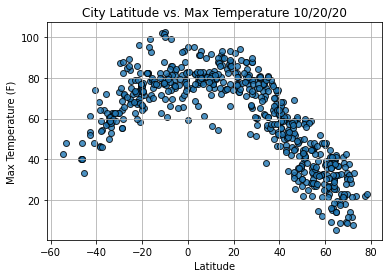

In [14]:

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

<h3>6.3.2: Plot Latitude vs. Humidity</h3>

* create a scatter plot that compares the latitude vs. the humidity.
* change the title to "Humidity," and the y-axis label to "Humidity (%)."

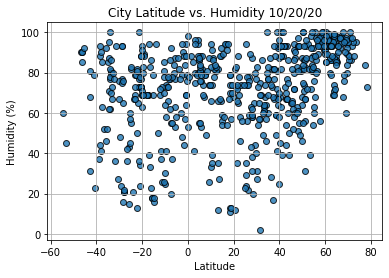

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


<h3>6.3.3: Plot Latitude vs. Cloudiness</h3>

<p>Refactor the code for our scatter plots by changing the y-axis variable to "cloudiness," the title to "Cloudiness (%)," and the y-axis label to "Cloudiness (%)."</p>

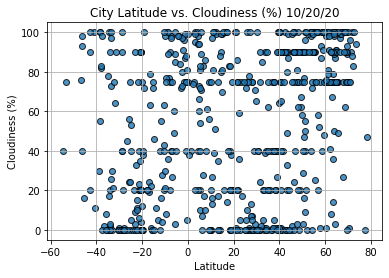

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


<h3>6.3.4: Plot Latitude vs. Wind Speed</h3>
<p>Repurpose the code and change the y-axis variable to "wind speed," the title to "Wind Speed," and the y-axis label to "Wind Speed (mph)."</p>

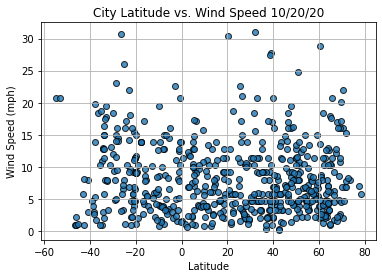

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()